In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os

In [2]:
tov_file = os.path.join("outputTOVpolytrope.txt")

(
    r_Schw,
    rho,
    rho_baryon,
    P,
    m,
    exp2phi,
    confFactor_exp4phi,
    rbar
) = np.loadtxt(tov_file).T

In [3]:
R_Schw_max = 9.566044579232511e-01
M = 1.405030336771405e-01 
rbar_max = 0.5 * (R_Schw_max - M + np.sqrt(R_Schw_max * (R_Schw_max - 2.0 * M)))

In [4]:
rbar_max

np.float64(0.8100085557410306)

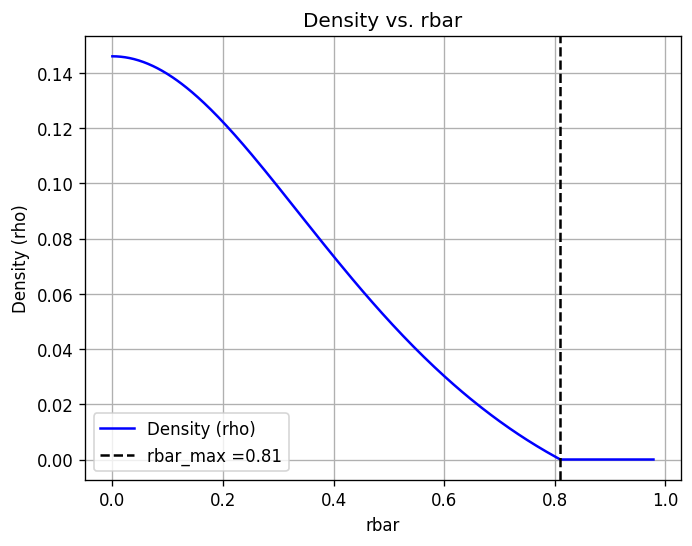

In [5]:
# Plot density (rho) vs. rbar using plt.plot
plt.figure(dpi=120)
plt.plot(rbar[rbar < 1.0], rho[rbar < 1.0], linestyle="-", color="b", label="Density (rho)")
# Plot a vertical line at rbar = rbar_max
plt.axvline(x=rbar_max, color="k", linestyle="--", label=f"rbar_max ={rbar_max:.2f}")
plt.xlabel("rbar")
plt.ylabel("Density (rho)")
plt.title("Density vs. rbar")
plt.legend()
plt.grid(True)

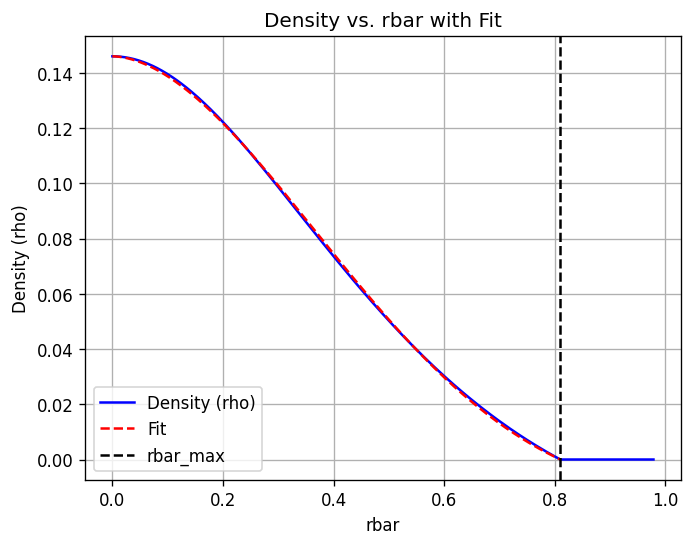

In [6]:
from scipy.optimize import curve_fit

# Define the trial function
def func(r, n, sigma):
    return rho[0] * (1. - r**2 / rbar_max**2) * np.exp(-r**n / sigma)

# Create a mask for the fitting region: 0 < rbar < rbar_max
mask = (rbar > 0) & (rbar < rbar_max)

# Use curve_fit to determine the best-fit parameters n and sigma
p0 = [1.8, 0.5]  # initial guess for n and sigma
params, _ = curve_fit(func, rbar[mask], rho[mask], p0=p0)
n_fit, sigma_fit = params

rho_fit = func(r = rbar[mask], n=n_fit, sigma=sigma_fit)

# Plot density (rho) vs. rbar using plt.plot and overlay the fitted function
plt.figure(dpi=120)
plt.plot(rbar[rbar < 1.0], rho[rbar < 1.0], linestyle="-", color="b", label="Density (rho)")
plt.plot(rbar[mask], rho_fit, linestyle="--", color="r", label="Fit")

# Plot a vertical line at rbar = rbar_max
plt.axvline(x=rbar_max, color="k", linestyle="--", label="rbar_max")

plt.xlabel("rbar")
plt.ylabel("Density (rho)")
plt.title("Density vs. rbar with Fit")
plt.legend()
plt.grid(True)


In [12]:
print(rho[0], n_fit, sigma_fit)

0.1459996111924645 1.7339250800463264 0.5184929551053847


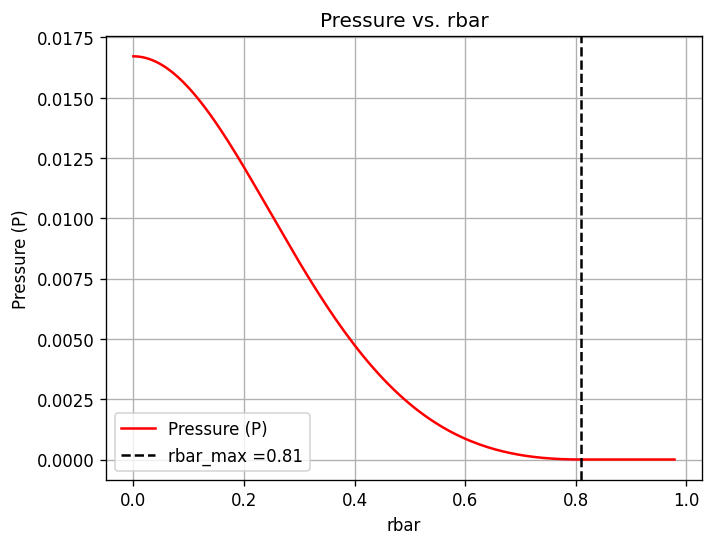

In [7]:
# Plot pressure (P) vs. rbar using plt.plot
plt.figure(dpi=120)
plt.plot(rbar[rbar < 1.0], P[rbar < 1.0], color="r", label="Pressure (P)")
# Plot a vertical line at rbar = rbar_max
plt.axvline(x=rbar_max, color="k", linestyle="--", label=f"rbar_max ={rbar_max:.2f}")
plt.xlabel("rbar")
plt.ylabel("Pressure (P)")
plt.title("Pressure vs. rbar")
plt.legend()
plt.grid(True)

# Display the plots
plt.show()

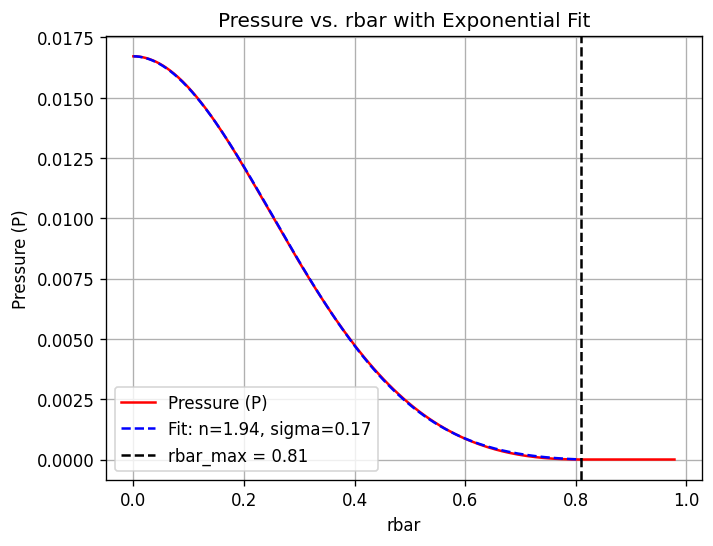

In [8]:
from scipy.optimize import curve_fit

# Define the trial function for pressure
def func_P(r, n, sigma):
    return P[0] * (1. - r**2 / rbar_max**2) * np.exp(-r**n / sigma)

# Create a mask for the fitting region: 0 < rbar < rbar_max
mask = (rbar > 0) & (rbar < rbar_max)

# Use curve_fit to determine the best-fit parameters n and sigma for pressure
p0_P = [1.8, 0.5]  # initial guess for n and sigma
params_P, _ = curve_fit(func_P, rbar[mask], P[mask], p0=p0_P)
n_P, sigma_P = params_P

# Compute the fitted pressure using the best-fit parameters
P_fit = func_P(rbar[mask], n_P, sigma_P)

# Plot pressure (P) vs. rbar using plt.plot and overlay the fitted function
plt.figure(dpi=120)
plt.plot(rbar[rbar < 1.0], P[rbar < 1.0], color="r", label="Pressure (P)")
plt.plot(rbar[mask], P_fit, linestyle="--", color="b",
         label=f"Fit: n={n_P:.2f}, sigma={sigma_P:.2f}")
# Plot a vertical line at rbar = rbar_max
plt.axvline(x=rbar_max, color="k", linestyle="--", label=f"rbar_max = {rbar_max:.2f}")

plt.xlabel("rbar")
plt.ylabel("Pressure (P)")
plt.title("Pressure vs. rbar with Exponential Fit")
plt.legend()
plt.grid(True)

plt.show()


In [11]:
print(P[0], n_P, sigma_P)

0.01671461121831567 1.9380083279682516 0.17181675341296368
